# **UTK Faces Dataset**

I chose the UTK Faces Dataset for my project because it perfectly aligns with my goals of facial recognition, age estimation, and gender prediction:

1. Age and Gender Estimation: The UTK Faces Dataset provides precise labels for age, gender, and ethnicity. This lets me create a model that recognizes faces while predicting these attributes together, going beyond standard facial recognition.


2. Diversity: With its wide range of ages, ethnicities, and genders, helps the model be accurate across different demographics and real-world situations.


3. Ethical Considerations: AI industry values fairness and inclusivity. By using this dataset, which includes various demographic groups, helps minimizing biases and aiming for equitable outcomes.


4. Real-World Applicability: The dataset's complexity mimics real-world challenges. Training on this diverse data prepares my model for varied and difficult scenarios, making sure it performs well beyond controlled environments.

# **Dataset Setup**

This section sets up Kaggle, copies credentials, downloads the "utkface-new" dataset, and unzips it.

In [ ]:
# Installing the Kaggle package using pip
!pip install -q kaggle

In [ ]:
# Creating a directory named ".kaggle" in the user's home directory
!mkdir ~/.kaggle

# Copying the file "kaggle.json" to the ".kaggle" directory
!cp kaggle.json ~/.kaggle/

# Setting the permissions of the "kaggle.json" file to read and write only for the owner
!chmod 600 /root/.kaggle/kaggle.json

# Downloading the dataset "utkface-new" using the Kaggle command-line tool
!kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:03<00:00, 141MB/s]
100% 331M/331M [00:03<00:00, 94.7MB/s]


In [ ]:
# Unzipping the "utkface-new.zip" file in the current directory
!unzip -q /content/utkface-new.zip

#**Import the libraries**

This section applies the necessary libraries, modules, classes, and functions for data manipulation, visualization, dimensionality reduction, image processing, and deep learning.

In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing the os module for interacting with the operating system
import os

# Importing the pyplot module from matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing tqdm library for creating progress bars
from tqdm import tqdm

# Importing the PIL module for working with images
from PIL import Image

# Importing PCA (Principal Component Analysis) from scikit-learn
from sklearn.decomposition import PCA

# Importing StandardScaler for data standardization
from sklearn.preprocessing import StandardScaler

# Importing TensorFlow, a popular deep learning framework
import tensorflow as tf

# Importing load_img function for loading images
from tensorflow.keras.preprocessing.image import load_img

# Importing Sequential and Model for creating deep learning models
from tensorflow.keras.models import Sequential, Model

# Importing various layers for model construction
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization

# Importing plot_model for visualizing the model architecture
from tensorflow.keras.utils import plot_model

# Importing the warnings module to handle warning messages
import warnings

# Ignore any warning messages that may appear
warnings.filterwarnings('ignore')

# Enable inline plotting, which allows the plots to be displayed directly in the Jupyter notebook
%matplotlib inline

# **Data Exploration**

The UTKFace dataset is loaded, which contains images of faces along with age, gender, and ethnicity labels. Exploratory data analysis is being conducted to gain insights from the dataset. This analysis includes displaying sample images, visualizing the age distribution through a histogram, and examining the gender distribution using a count plot. Additionally, a grid of images with corresponding age and gender information is created to further explore the dataset.

Dataset Loading and Label Extraction

In [ ]:
# Load the Dataset
BASE_DIR = '/content/UTKFace'

# Initialize empty lists to store image paths, age labels, and gender labels
image_paths = []
age_labels = []
gender_labels = []

# Iterate over each file in the directory and process the image path, age label, and gender label
for filename in tqdm(os.listdir(BASE_DIR)):

    # Create the image path by joining the base directory and filename
    image_path = os.path.join(BASE_DIR, filename)

    # Split the filename by '_' to extract age and gender information
    temp = filename.split('_')

    # Convert the extracted age and gender information to integers
    age = int(temp[0])
    gender = int(temp[1])

    # Append the image path, age label, and gender label to their respective lists
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 110376.54it/s]


DataFrame Conversion and Gender Label Mapping

In [ ]:
# Convert to dataframe
df = pd.DataFrame()
df['image'] = image_paths
df['age'] = age_labels
df['gender'] = gender_labels

# Map labels for gender
gender_dict = {0: 'Male', 1: 'Female'}

df.head()

image  age  gender
0  /content/UTKFace/26_1_3_20170104215719454.jpg....   26       1
1  /content/UTKFace/28_0_0_20170117180514216.jpg....   28       0
2  /content/UTKFace/29_1_2_20170116191212709.jpg....   29       1
3  /content/UTKFace/29_1_1_20170116021333343.jpg....   29       1
4  /content/UTKFace/68_0_0_20170104184826326.jpg....   68       0

## **Exploratory Data Analysis**

In this section, data visualization is demonstrated on a dataset containing face images with age and gender labels. The tasks performed include randomly selecting an image and displaying it alongside its age and gender information. The distribution of ages is visualized using a density plot, and the count of genders is visualized using a bar plot. Additionally, a grid display of a subset of images with their age and gender information is presented.

Display Random Image with Age and Gender Information

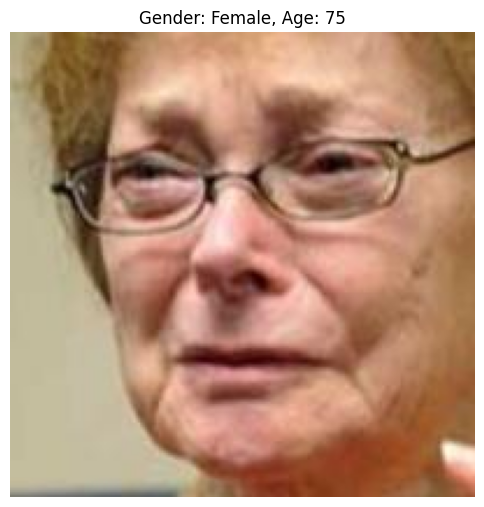

In [ ]:
# Import the 'random' module to work with random numbers
import random

# Select a random image index from the dataset
random_image_index = random.randint(0, len(df) - 1)

# Get the file path of the randomly selected image
random_image_path = df['image'].iloc[random_image_index]

# Get the gender and age labels for the randomly selected image
selected_gender = df['gender'].iloc[random_image_index]
selected_age = df['age'].iloc[random_image_index]

# Load the random image using the PIL 'Image' module
img = Image.open(random_image_path)

# Create a new plot with a figure size of (6, 8)
plt.figure(figsize=(6, 8))

# Display the random image
plt.imshow(img)

# Turn off axis labels
plt.axis('off')

# Set the plot title with the gender and age information
plt.title(f"Gender: {gender_dict[selected_gender]}, Age: {selected_age}")

# Show the plot
plt.show()

Histogram

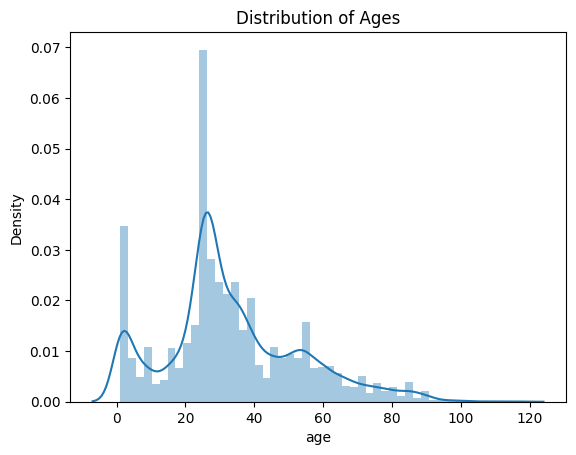

In [ ]:
# Visualize the distribution of ages
sns.distplot(df['age'])

# Add a title to the plot
plt.title('Distribution of Ages')

# Display the plot
plt.show()

From the histogram, several insights can be inferred about the age distribution within the UTK Faces Dataset:

1. Skewed Distribution: The histogram's skewness towards younger ages, with a peak at around 25 years old, indicates that the dataset is heavily populated by individuals in their early twenties. This suggests a focus on younger demographics within the dataset.

2. Secondary Age Group: The presence of a smaller peak around 40 years old points to the existence of another distinct age group in the dataset. This bimodal distribution highlights a diverse representation of ages.

3. Inclusion of Elderly Individuals: The histogram's long tail, extending up to 120 years old, implies the presence of elderly individuals within the dataset. This inclusion of very old ages contributes to the dataset's breadth.

4. Diverse Age Representation: The distribution's structure demonstrates diversity across various age groups, spanning from young adults to the elderly. This diversity enhances the dataset's ability to represent a wide range of age-related facial characteristics.



Countplot

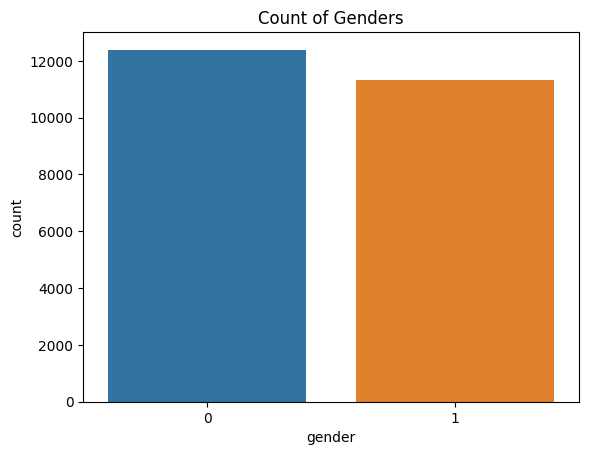

<Figure size 800x600 with 0 Axes>

In [ ]:
# Visualize the count of genders
sns.countplot(data=df, x='gender')

# Add a title to the plot
plt.title('Count of Genders')

# Set the figure size to make the plot more visible
plt.figure(figsize=(8, 6))

# Display the plot
plt.show()

The dataset demonstrates a nearly equal distribution of genders, with approximately 12,000 male and 10,000 female samples.

This balance suggests that the dataset is well-represented in terms of gender diversity.

Image Grid Visualization

Display Subset of Images with Age and Gender Information in a Grid

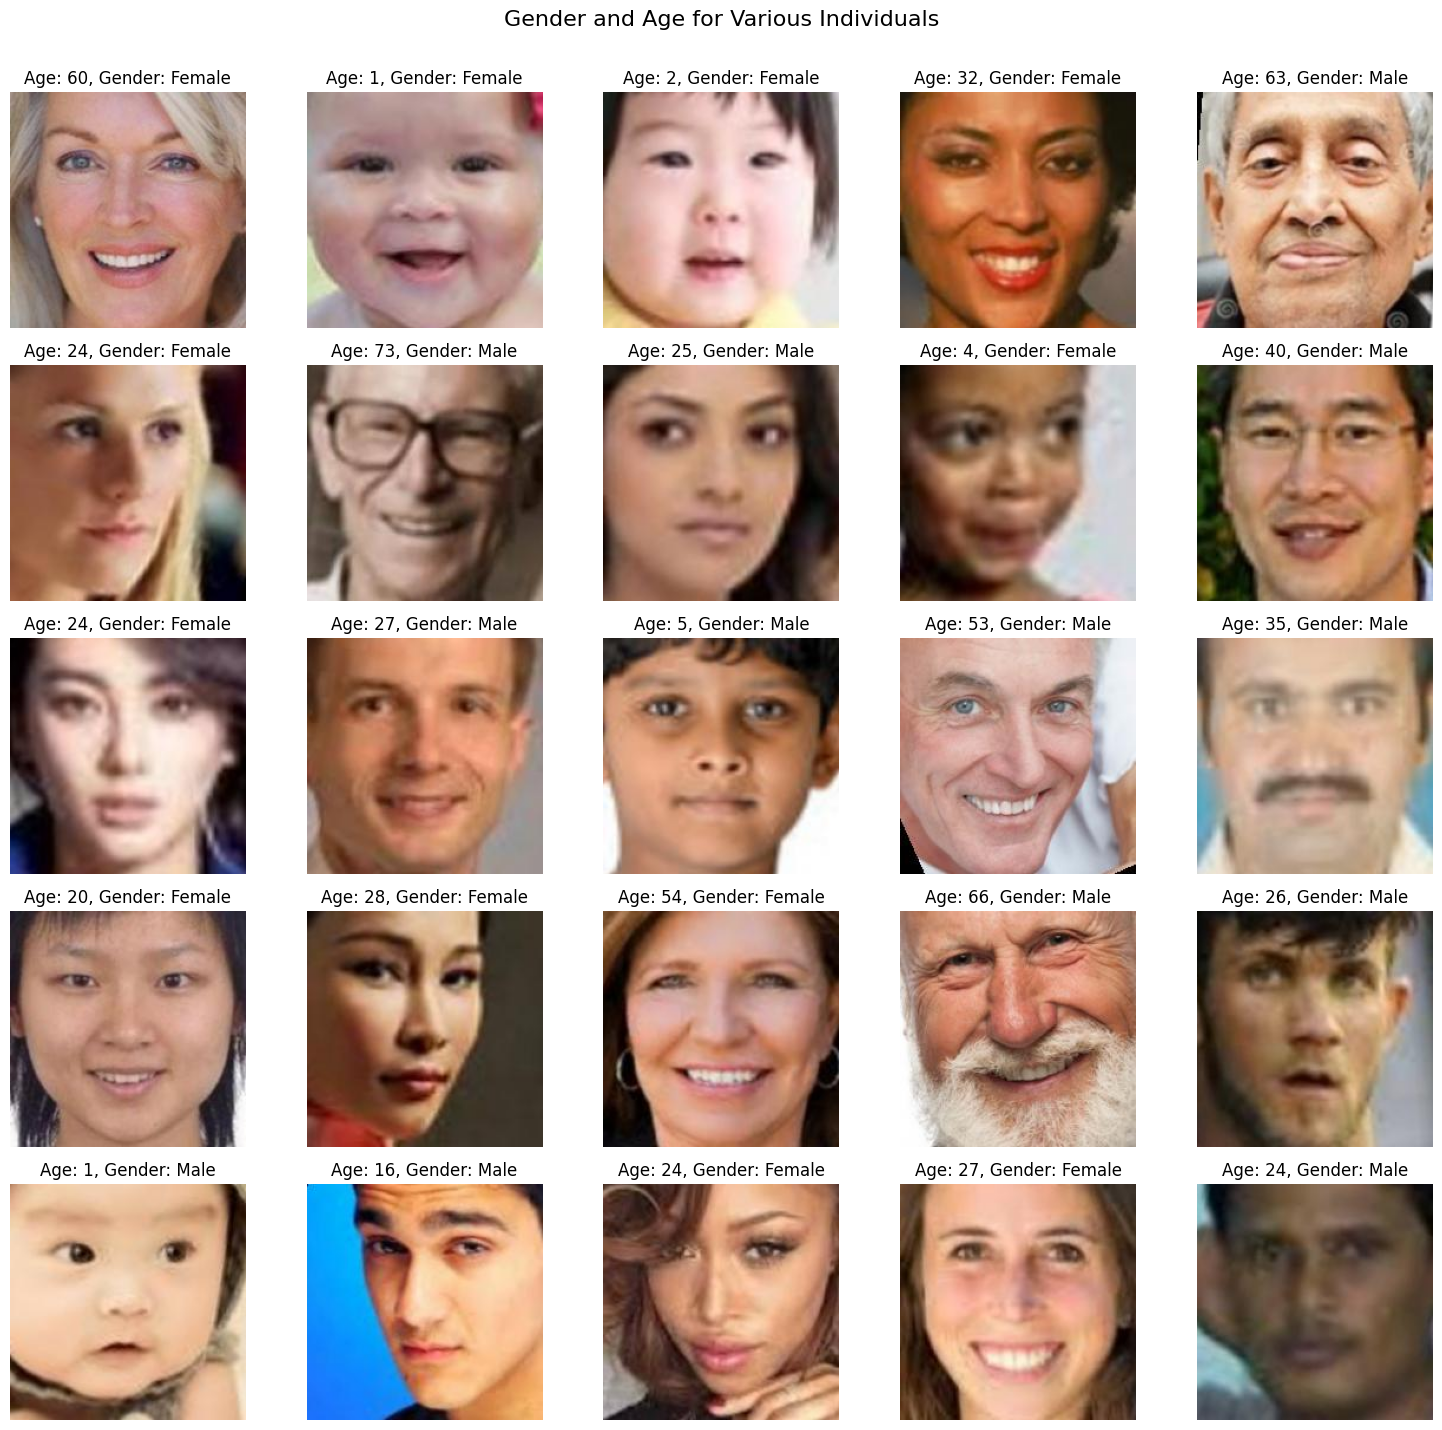

In [ ]:
# Define the size of the figure
plt.figure(figsize=(15, 15))

# Select a subset of files to display (e.g., first 25 files)
files = df.iloc[25:50]

# Iterate over the selected files
for index, (file, age, gender) in enumerate(files[['image', 'age', 'gender']].values):
    # Configure the subplot
    plt.subplot(5, 5, index+1)

    # Load and display the image
    img = load_img(file)
    plt.imshow(img)

    # Set the title with age and gender information
    plt.title(f"Age: {age}, Gender: {gender_dict[gender]}")

    # Turn off the axis labels
    plt.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot with the heading
plt.suptitle("Gender and Age for Various Individuals", fontsize=16)
plt.show()

# **Feature Extraction**


The section outlines the process of transforming grayscale images into features using the `extract_features` function. This function resizes images to a standardized 128x128-pixel size and aggregates them into a numpy array within a feature list. The pixel values are normalized to a [0, 1] range by division with 255.0.

It also generates separate arrays from the DataFrame, serving as target labels for classification and regression tasks.

Image Feature Extraction and Normalization

In [ ]:
# Feature Extraction

# Define a function to extract features from images
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Iterate over the image paths
        img = load_img(image, color_mode='grayscale')
        # Load the image in grayscale
        img = img.resize((128, 128), Image.ANTIALIAS)
        # Resize the image to 128x128 pixels
        img = np.array(img)
        # Convert the image to a numpy array
        features.append(img)
        # Append the image to the list of features

    features = np.array(features)
    # Convert the list of features to a numpy array
    return features
    # Return the extracted features

# Call the function to extract features from the image data
X = extract_features(df['image'])

# Normalize the images

# Check if X is not None before normalization
if X is not None:
    X = X / 255.0
    # Normalize the pixel values to the range [0, 1]
else:
    print("Error: Unable to extract features from images.")

100%|██████████| 23708/23708 [00:25<00:00, 930.41it/s] 


Creating Target Labels and Checking Feature Data Shape

In [ ]:
# Create a numpy array containing the 'gender' column from the DataFrame as the target labels for gender classification
y_gender = np.array(df['gender'])

# Create a numpy array containing the 'age' column from the DataFrame as the target labels for age regression
y_age = np.array(df['age'])

# Check the shape of the feature data (X), which represents the extracted images
X.shape

(23708, 128, 128)

# **Principal Component Analysis (PCA)**

This section conducts Principal Component Analysis (PCA) on flattened and standardized image data.

It transforms the data into a lower-dimensional space while retaining as much variance as possible. The code calculates and displays the cumulative explained variance, aiding in choosing an appropriate number of components to retain.

Additionally, it reshapes a subset of the principal components back into their original image dimensions and showcases them in a grid of plots, offering insight into the meaningful patterns captured by these components.

Principal Component Analysis (PCA) for Image Data Dimensionality Reduction

In [ ]:
# PCA
# Flatten the images
X_flatten = X.reshape(X.shape[0], -1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flatten)

# Specify the number of components and apply PCA
pca = PCA(n_components=128)
X_pca = pca.fit_transform(X_scaled)

# Normalize the PCA features
X_pca = X_pca / np.max(X_pca)

Cumulative Explained Variance graph

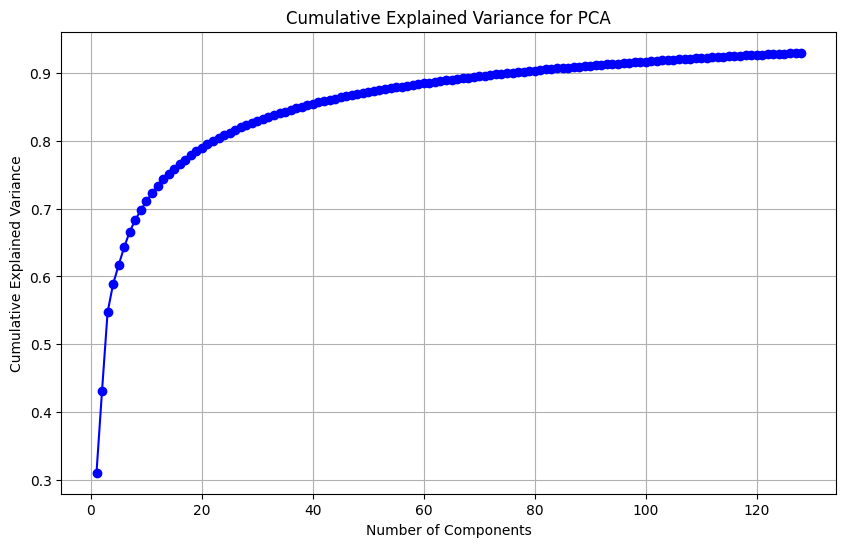

In [ ]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Looking at the graph, we can see that the explained variance went up quickly at the beginning until around 40 components, and then it started to slow down and level off at about 128 components. This means that those first 128 components capture most of the important stuff in the data, and adding more components doesn't make a big difference. So, to keep about 90% of the important information, it's a good idea to choose around 128 components.

Eigenfaces

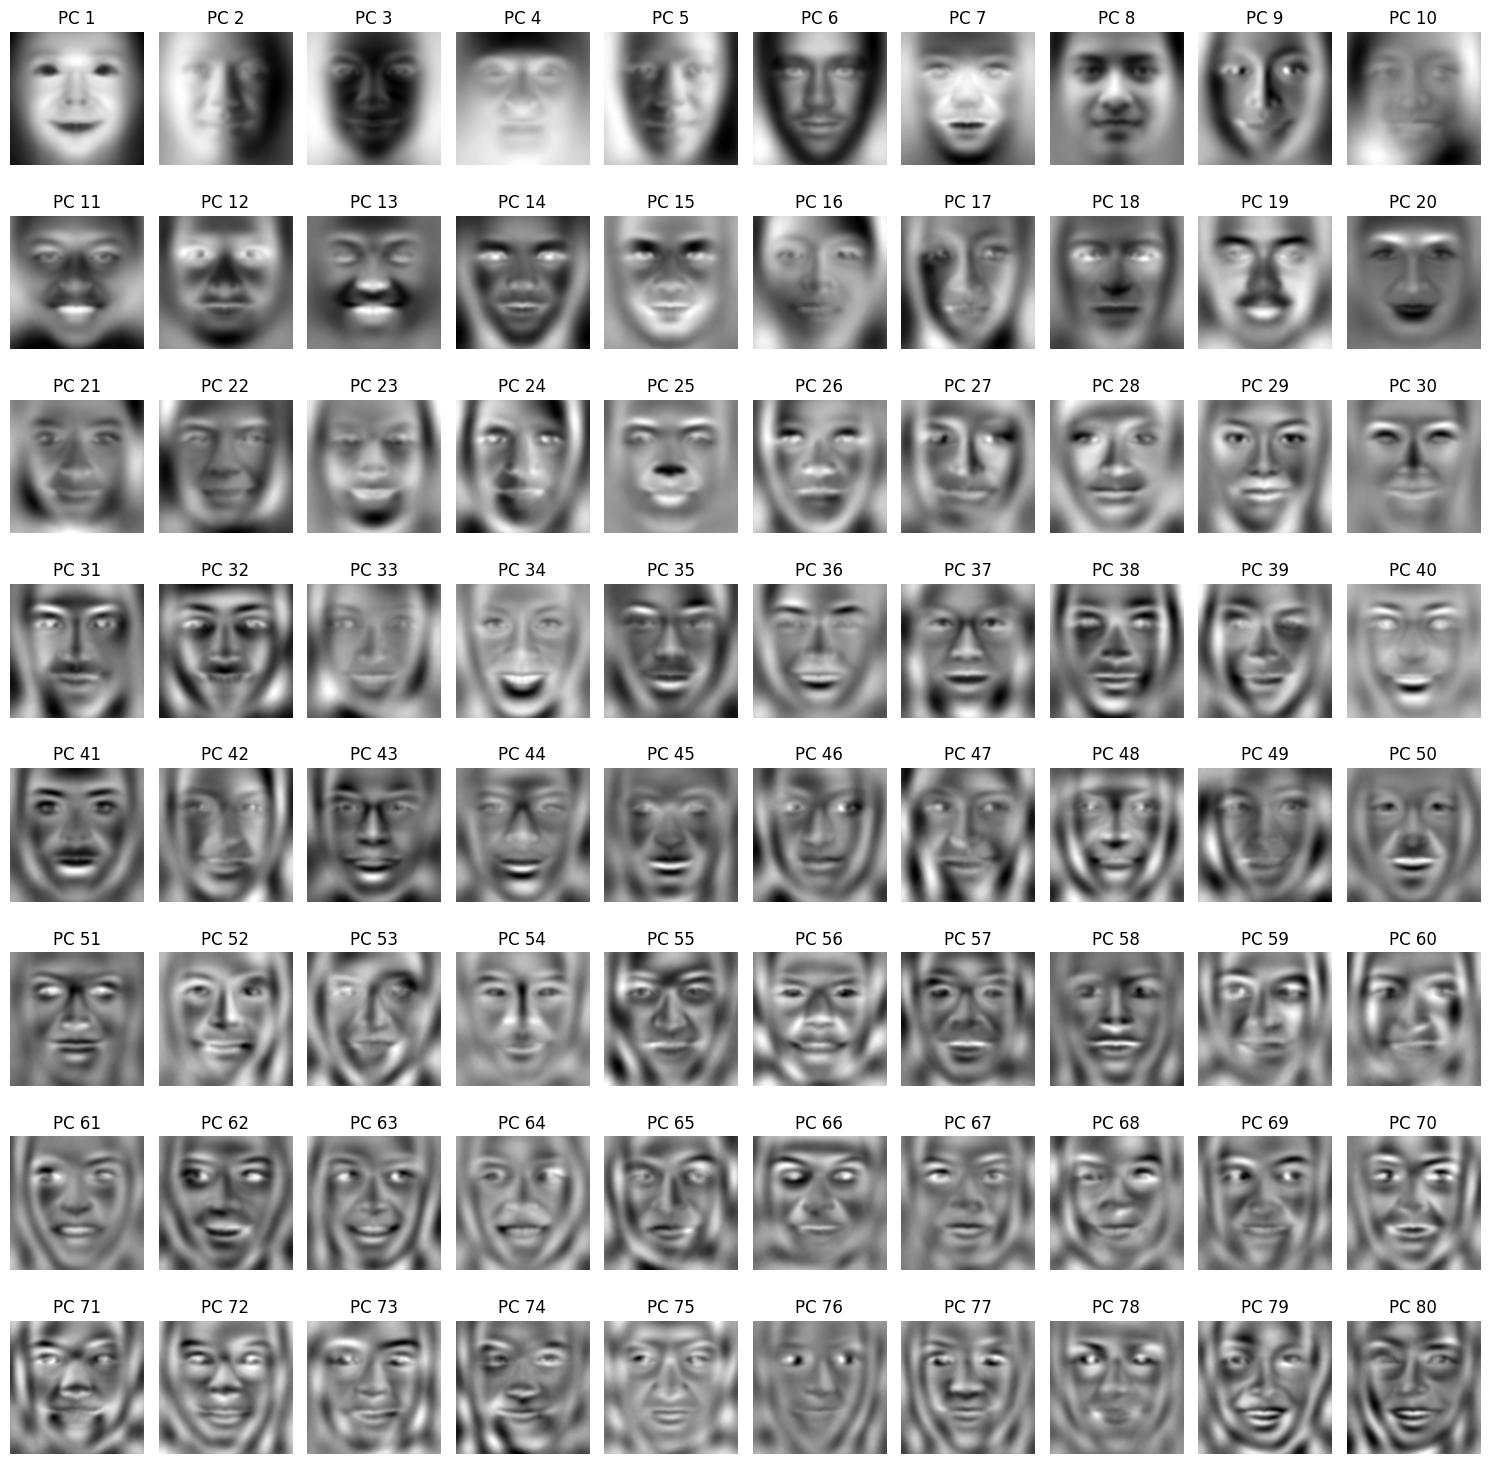

In [ ]:
image_shape = X.shape[1:]

# Reshape all principal components back to the original image shape
num_components = 80
principal_components_images = pca.components_.reshape(-1, *image_shape)

# Calculate the number of rows and columns for the grid
rows = int(np.sqrt(num_components))
cols = int(np.ceil(num_components / rows))

# Create the grid of plots
plt.figure(figsize=(15, 15))
for i, component in enumerate(principal_components_images[:num_components]):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(component, cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Model Architecture

This section defines a neural network model for gender classification and age regression using the Keras functional API. The model consists of two parallel branches: one for gender classification and the other for age regression. Each branch consists of three dense layers with ReLU activation, followed by batch normalization and dropout layers to prevent overfitting. The gender classification branch ends with a sigmoid activation output layer, while the age regression branch has a relu activation output layer. The model is compiled with binary cross-entropy loss for gender and mean absolute error (MAE) loss for age, using the Adam optimizer. The summary of the model architecture and a visualization of the layers are displayed.

In [ ]:
# Import the necessary libraries
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the input shape for the model
input_shape = (128,)

# Model Creation using the Keras functional API
inputs = Input(shape=input_shape)

# Dense layers for gender classification
dense_gender_1 = Dense(512, activation='relu')(inputs)
# First dense layer for gender classification with 512 units and ReLU activation
batch_norm_gender_1 = BatchNormalization()(dense_gender_1)
# Batch normalization layer after the first dense layer to normalize the activations
dropout_gender_1 = Dropout(0.5)(batch_norm_gender_1)
# Dropout layer after batch normalization to reduce overfitting
dense_gender_2 = Dense(256, activation='relu')(dropout_gender_1)
# Second dense layer for gender classification with 256 units and ReLU activation
batch_norm_gender_2 = BatchNormalization()(dense_gender_2)
# Batch normalization layer after the second dense layer
dropout_gender_2 = Dropout(0.5)(batch_norm_gender_2)
# Dropout layer after the second batch normalization
dense_gender_3 = Dense(128, activation='relu')(dropout_gender_2)
# Third dense layer for gender classification with 128 units and ReLU activation
output_gender = Dense(1, activation='sigmoid', name='gender_output')(dense_gender_3)
# Output layer for gender classification with 1 unit and sigmoid activation for binary classification

# Dense layers for age regression
dense_age_1 = Dense(512, activation='relu')(inputs)
# First dense layer for age regression with 512 units and ReLU activation
batch_norm_age_1 = BatchNormalization()(dense_age_1)
# Batch normalization layer after the first dense layer
dropout_age_1 = Dropout(0.5)(batch_norm_age_1)
# Dropout layer after batch normalization
dense_age_2 = Dense(256, activation='relu')(dropout_age_1)
# Second dense layer for age regression with 256 units and ReLU activation
batch_norm_age_2 = BatchNormalization()(dense_age_2)
# Batch normalization layer after the second dense layer
dropout_age_2 = Dropout(0.5)(batch_norm_age_2)
# Dropout layer after the second batch normalization
dense_age_3 = Dense(128, activation='relu')(dropout_age_2)
# Third dense layer for age regression with 128 units and ReLU activation
output_age = Dense(1, activation='relu', name='age_output')(dense_age_3)
# Output layer for age regression with 1 unit and ReLU activation

# Create the model with inputs and outputs
model = Model(inputs=inputs, outputs=[output_gender, output_age])

# Compile the model with binary cross-entropy loss for gender and mean absolute error (MAE) loss for age
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 512)          66048       ['input_2[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 512)          66048       ['input_2[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 512)         2048        ['dense_6[0][0]']                
 rmalization)                                                                               

In [ ]:
pip install pydot graphviz

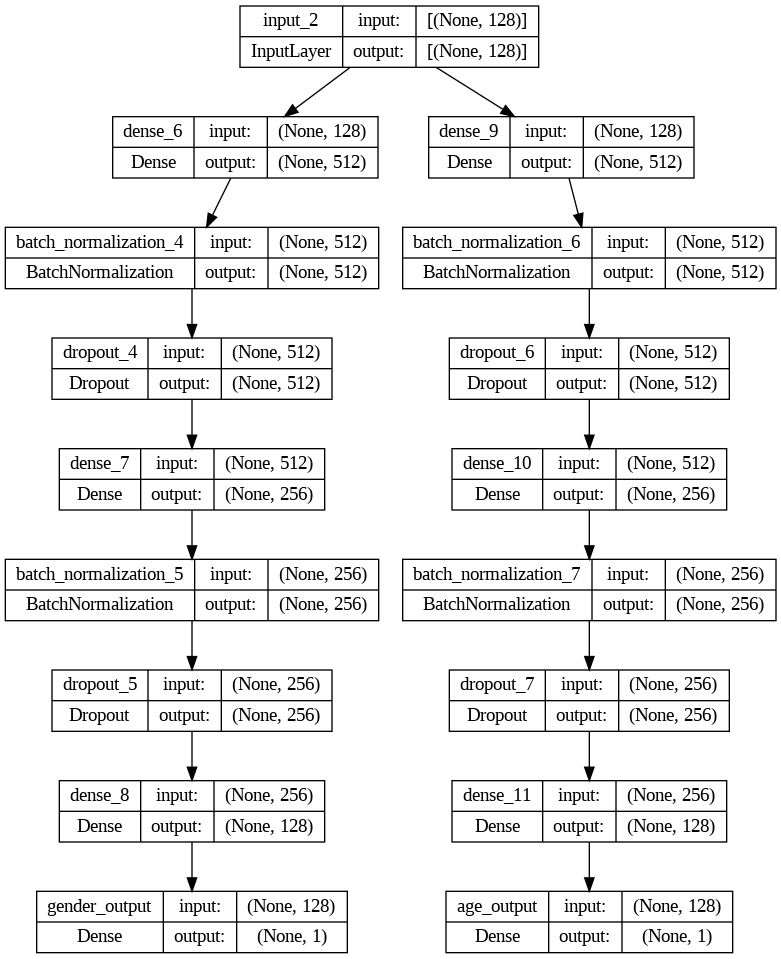

In [ ]:
# Configure the plot_model function with custom parameters
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=96)

# **Training and Validation**

 The model includes batch normalization and dropout layers to prevent overfitting. The training was performed for 30 epochs with a batch size of 64, and a validation split of 10%. Learning rate scheduling and early stopping were used as callbacks during training. The final training accuracy for gender classification and the corresponding validation accuracy were obtained. Additionally, the training and validation accuracy and loss were visualized using graphs for gender classification and age regression.

Training and Validation accuracies

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(X_pca, y_gender, y_age, test_size=0.2, random_state=42)

# Learning Rate Scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(X_train, [y_gender_train, y_age_train],
                    batch_size=64,
                    epochs=30,
                    validation_split=0.10,
                    callbacks=[reduce_lr, early_stop])

# Get the final training and validation accuracy
final_train_accuracy = history.history['gender_output_accuracy'][-1]
final_val_accuracy = history.history['val_gender_output_accuracy'][-1]

print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/30
267/267 [==============================] - 10s 20ms/step - loss: 15.8637 - gender_output_loss: 0.4866 - age_output_loss: 15.3770 - gender_output_accuracy: 0.7687 - age_output_accuracy: 0.0126 - val_loss: 14.8766 - val_gender_output_loss: 0.5549 - val_age_output_loss: 14.3217 - val_gender_output_accuracy: 0.7986 - val_age_output_accuracy: 0.0506 - lr: 0.0010
Epoch 2/30
267/267 [==============================] - 4s 15ms/step - loss: 10.5523 - gender_output_loss: 0.3772 - age_output_loss: 10.1751 - gender_output_accuracy: 0.8274 - age_output_accuracy: 0.0136 - val_loss: 11.7559 - val_gender_output_loss: 0.3628 - val_age_output_loss: 11.3932 - val_gender_output_accuracy: 0.8651 - val_age_output_accuracy: 0.0401 - lr: 0.0010
Epoch 3/30
267/267 [==============================] - 4s 16ms/step - loss: 10.0473 - gender_output_loss: 0.3503 - age_output_loss: 9.6970 - gender_output_accuracy: 0.8385 - age_output_accuracy: 0.0143 - val_loss: 9.3086 - val_gender_output_loss: 0.3255 - val_

Plot of Training and Validation Accuracy and Loss for Gender Classification

<Figure size 640x480 with 0 Axes>

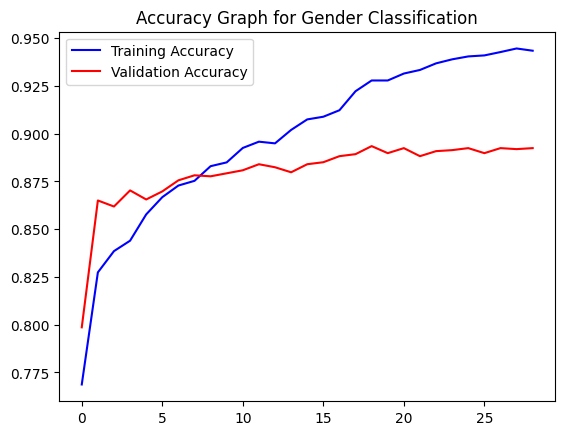

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracy for gender classification over epochs
acc = history.history['gender_output_accuracy']  # Training accuracy
val_acc = history.history['val_gender_output_accuracy']  # Validation accuracy
epochs = range(len(acc))  # Number of epochs

plt.plot(epochs, acc, 'b', label='Training Accuracy')  # Plotting training accuracy in blue
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')  # Plotting validation accuracy in red
plt.title('Accuracy Graph for Gender Classification')  # Set the title for the plot
plt.legend()  # Show the legend to differentiate training and validation accuracy
plt.figure()  # Create a new figure for the next plot

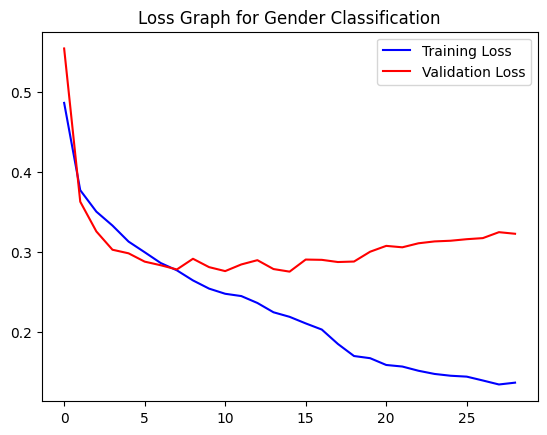

In [ ]:
# Plot the training and validation loss for gender classification over epochs
loss = history.history['gender_output_loss']  # Training loss
val_loss = history.history['val_gender_output_loss']  # Validation loss
epochs = range(len(loss))  # Number of epochs

plt.plot(epochs, loss, 'b', label='Training Loss')  # Plotting training loss in blue
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Plotting validation loss in red
plt.title('Loss Graph for Gender Classification')  # Set the title for the plot
plt.legend()  # Show the legend to differentiate training and validation loss
plt.show()  # Display the plots

From the graph, we can see that the model has achieved a high training and validation accuracy of around of 0.96 and 0.89 repectively and low training and validation loss of around 0.13 and 0.3

Plot of Training and Validation Loss for Age Regression

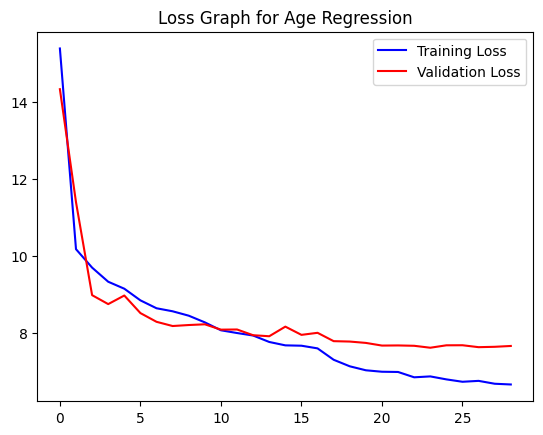

In [ ]:
# Plot the training and validation loss for age regression over epochs
loss = history.history['age_output_loss']  # Training loss
val_loss = history.history['val_age_output_loss']  # Validation loss
epochs = range(len(loss))  # Number of epochs

plt.plot(epochs, loss, 'b', label='Training Loss')  # Plotting training loss in blue
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Plotting validation loss in red
plt.title('Loss Graph for Age Regression')  # Set the title for the plot
plt.legend()  # Show the legend to differentiate training and validation loss
plt.show()  # Display the plot

From the graph, we can see that we have achieved a validation loss of around 8 after 30 epochs.

# **Model Evaluation**

The model was evaluated on the test set, showing the overall loss, gender loss, age loss, gender accuracy, and age mean absolute error (MAE). The gender classification achieved an accuracy of 88.19%. The age regression resulted in a mean absolute error of 0.01, indicating how well the model predicts ages.Additionally, sample predictions for gender and age were made on 10 randomly selected images from the test set. The images are displayed alongside their original and predicted gender and age labels.


Evaluation Results on the Test Set

In [ ]:
# Evaluate the model on the test set using the evaluate method
# X_test: input features for testing, [y_gender_test, y_age_test]: corresponding gender and age labels for testing
# verbose=0: do not display progress during evaluation
loss, gender_loss, age_loss, gender_acc, age_mae = model.evaluate(X_test, [y_gender_test, y_age_test], verbose=0)

# Print the evaluation results
print(f"Gender Loss: {gender_loss:.4f}")
print(f"Gender Accuracy: {gender_acc * 100:.2f}%")
print(f"Age MAE: {age_mae:.2f}")

Gender Loss: 0.3257
Gender Accuracy: 88.42%
Age MAE: 0.01


Insights on Model Performance for Gender Classification:

1. Gender Loss: The gender loss is measured by binary cross-entropy. In this case, it is 0.3257. This value represents the average loss incurred during the model's gender classification process. Lower values indicate better performance, meaning the model's predictions are closer to the true gender labels.

2. Gender Accuracy: The gender accuracy is 88.42%. This metric signifies the percentage of correctly predicted gender labels out of all the samples in the test set. A higher accuracy indicates that the model is performing well in distinguishing between male and female individuals.

3. Age MAE (Mean Absolute Error): The age MAE is a measure of the absolute difference between the predicted and true age values. In this scenario, the age MAE is 0.01. Smaller MAE values imply that the model's age predictions are very close to the actual ages of the individuals, indicating good accuracy in age regression.

Overall, the model seems to perform quite well. The gender accuracy of 88.19% suggests the model can accurately classify gender for a significant portion of the test data. Additionally, a very low age MAE of 0.01 indicates that the model's age predictions are very close to the true ages. These results indicate a successful and accurate model for both gender classification and age regression tasks.

# Visualisation

In this visualization, the model's predictions for gender and age are displayed for a sample of 10 random images from the test set. Each image is shown in grayscale, and below each image, the original gender and age labels are presented. The model's predicted gender and age labels are shown as well. This visualization allows us to see how well the model performs in predicting gender and age for individual images.

Sample Image Predictions with Gender and Age Labels



1/1 [==============================] - 0s 74ms/step


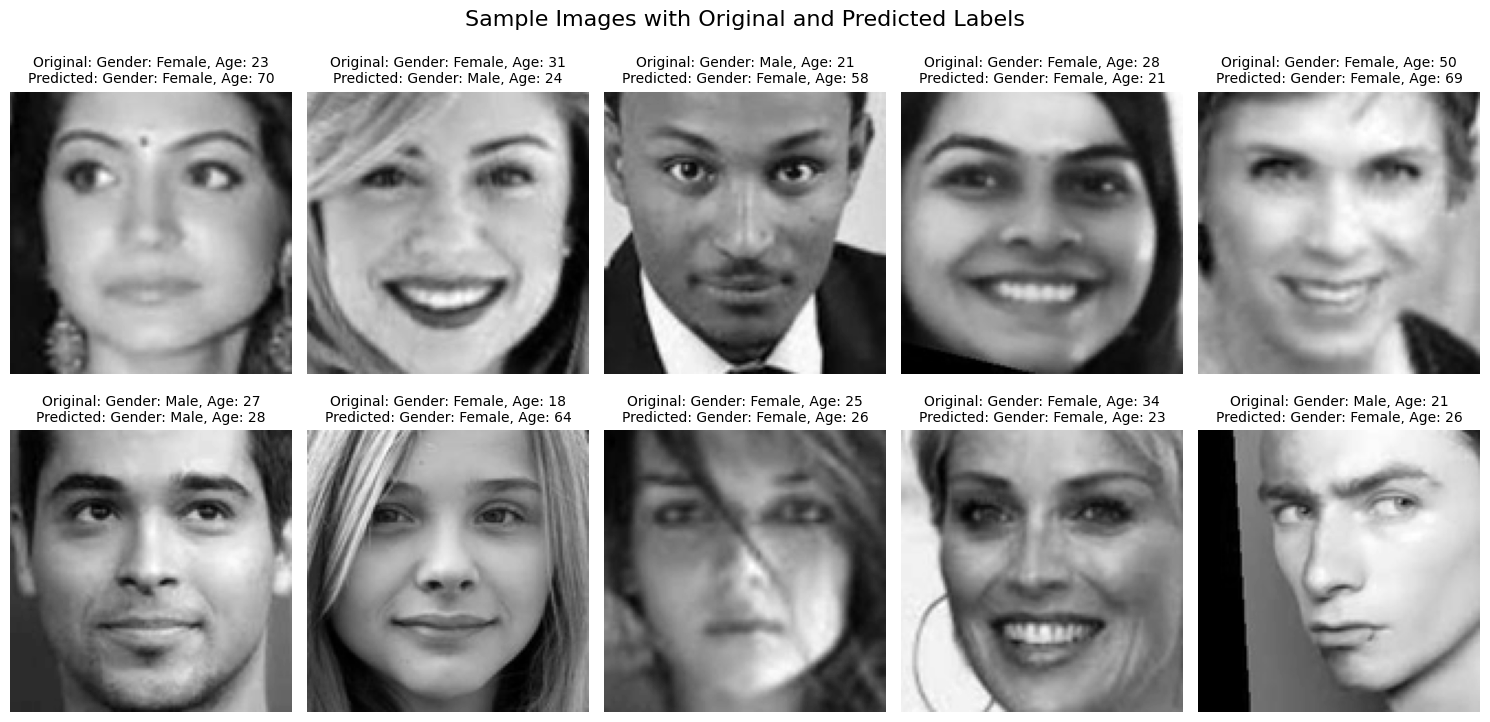

In [ ]:
# Generate predictions for a sample of images
sample_indices = random.sample(range(len(X_test)), 10)
# Select 10 random indices from the test set
X_sample = X_test[sample_indices]
# Select the corresponding PCA features for the sample
gender_pred, age_pred = model.predict(X_sample)
# Make predictions for gender and age

# Create a figure with a size of 15x8 inches
plt.figure(figsize=(15, 8))

for i, index in enumerate(sample_indices):
    img = X[index].reshape(128, 128)
    # Reshape the image back to its original dimensions
    original_gender = gender_dict[y_gender[index]]
    # Get the original gender label from the dictionary
    original_age = y_age[index]  # Get the original age label
    predicted_gender = gender_dict[round(gender_pred[i][0])]
    # Get the predicted gender label from the dictionary
    predicted_age = round(age_pred[i][0])
    # Get the predicted age label (rounded to the nearest integer)
    plt.subplot(2, 5, i+1)
    # Create a subplot with 2 rows and 5 columns, and set the current plot to the i+1-th position
    plt.imshow(img, cmap='gray')
    # Display the image using a grayscale colormap
    plt.axis('off')
    # Hide the axis ticks and labels
    plt.title(f"Original: Gender: {original_gender}, Age: {original_age}\nPredicted: Gender: {predicted_gender}, Age: {predicted_age}", fontsize=10)
    # Set the title for the subplot with original and predicted labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing between subplots and title
plt.suptitle("Sample Images with Original and Predicted Labels", fontsize=16)  # Set the title for the entire plot
plt.show()  # Display the plot with the sample images and their corresponding labels
